In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

In [2]:
class GMMsampler:
    
    def __init__( self, n_samples, n_components=1, weights=[1], mu=[np.array([0,0])], sig=[np.array([[1,0],[0,1]])]):
        self.n_components = n_components
        self.n_samples = n_samples
        self.weights = weights
        self.mu = mu
        self.sig = sig
        self.dim = mu[0].size
        self.data = np.empty([n_samples, self.dim])
        self.datacid = dict()
        
    def check_musig(self):
        shmu = self.mu[0].shape
        shsig = self.sig[0].shape
        if(not(all(m.shape==shmu for m in mu))):
            print('all mean vectors must be of same dimension')
        if(not(all(s.shape==shmu for s in sig))):
            print('all covariance matrix must be of same dimension')
    
    def gen_sample(self):
        for i in range(self.n_components):
            self.datacid[i] = []
        for i in range(self.n_samples):
            idx = np.random.choice(np.arange(0,self.n_components), p=(self.weights)/np.sum(self.weights))
            mu_,sig_ = self.mu[idx], self.sig[idx]
            self.data[i,:] = np.random.multivariate_normal(mu_, sig_)
            self.datacid[idx].append(self.data[i,:])
        for idx in range(self.n_components):
            self.datacid[idx] = np.array(self.datacid[idx]).reshape(-1,2)
            
    def plot_centers(self):
        plt.figure()
        for c in self.mu:
            plt.scatter(c[0], c[1])
        plt.show()
        
    def plot_data(self):
        plt.figure()
        for i in range(self.n_components):
            plt.scatter(self.datacid[i][:,0], self.datacid[i][:,1])
        plt.show()

In [3]:
m1 = np.array([-1, 0])
m2 = np.array([1, 0])
m3 = np.array([0, 1])
m4 = np.array([0, -1])
m5 = np.array([1/np.sqrt(2), 1/np.sqrt(2)])
m6 = np.array([1/np.sqrt(2), -1/np.sqrt(2)])
m7 = np.array([-1/np.sqrt(2), 1/np.sqrt(2)])
m8 = np.array([-1/np.sqrt(2), -1/np.sqrt(2)])

sig1 = np.eye(2)*0.1414
sig2 = np.eye(2)*0.1414
sig3 = np.eye(2)*0.1414
sig4 = np.eye(2)*0.1414
sig5 = np.eye(2)*0.1414
sig6 = np.eye(2)*0.1414
sig7 = np.eye(2)*0.1414
sig8 = np.eye(2)*0.1414

g = GMMsampler(1000,8,weights=[0.130, 0.128, 0.122, 0.120, 0.121, 0.129, 0.123, 0.127], mu=[m1, m2, m3, m4, m5, m6, m7, m8], sig=[sig1, sig2, sig3, sig4, sig5, sig6, sig7, sig8])

In [4]:
g.gen_sample()

In [5]:
g.datacid[0][:,1]

array([-0.35379096,  0.05660157, -0.08768494, -0.11144497,  0.24980843,
        0.3838102 ,  0.32205583,  0.34900587,  0.43412512,  0.20396385,
       -0.23224501,  0.06163724, -0.11576926,  0.30903976, -0.62288103,
       -0.19085926,  0.08047097,  0.65981775, -0.52757133, -0.34401461,
        0.13839846,  0.59566723, -0.57324347,  0.0891571 ,  0.2818888 ,
        0.35979986,  0.37815172, -0.51661917,  0.29917772,  0.22620185,
       -0.58307046, -0.5006724 , -0.10580523,  0.77170303, -0.43491115,
       -0.23269355,  0.33826954,  0.22380711,  0.23639645,  0.53731151,
        0.63694326,  0.33118843, -0.46649436, -0.66259527,  0.19225593,
       -0.55220025, -0.54087828, -0.44343844, -0.42676369, -0.06371987,
        0.51759889,  0.02369669, -0.39497513, -0.48831114, -0.47540274,
        0.06024611, -0.34736522, -0.48379032,  0.08801055,  0.21275574,
        0.03942479, -0.435253  , -0.23498716, -0.11277913,  0.29079421,
       -0.3067672 , -0.00962552,  0.39078056, -0.44062962,  0.53

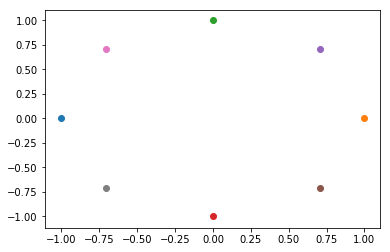

In [6]:
g.plot_centers()

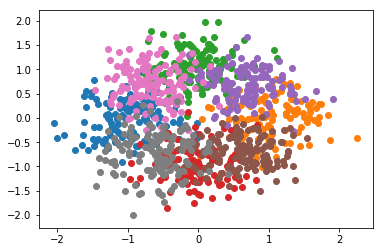

In [7]:
g.plot_data()